Aim: Predicting the <b>Covid-19</b> trend using basic ML


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
dataset = pd.read_csv('data/covid19/total_cases.csv')
canada = dataset[['date','Canada']]
canada = canada.rename(columns={'Canada':'cases'})
canada.head()

,date,cases
0,2020-01-21,NaN
1,2020-01-22,NaN
2,2020-01-23,NaN
3,2020-01-24,NaN
4,2020-01-25,NaN


drop the NaN rows

In [3]:
canada = canada.dropna()
canada.head()

,date,cases
6,2020-01-27,1.0
7,2020-01-28,2.0
8,2020-01-29,3.0
9,2020-01-30,3.0
10,2020-01-31,3.0


convert date data type to datetime instead of string

In [4]:
canada['date'] = pd.to_datetime(canada['date'])
canada.dtypes

date     datetime64[ns]
cases           float64
dtype: object

To register the converters:

In [5]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Plot the data

In [6]:
X = canada['date']
X = X.factorize()[0].reshape(-1, 1)
X = pd.DataFrame(X)
X.head()

,0
0,0
1,1
2,2
3,3
4,4


In [7]:
Y = canada['cases'].values.reshape(-1, 1)
Y = pd.DataFrame(Y)
Y.head()

,0
0,1.0
1,2.0
2,3.0
3,3.0
4,3.0


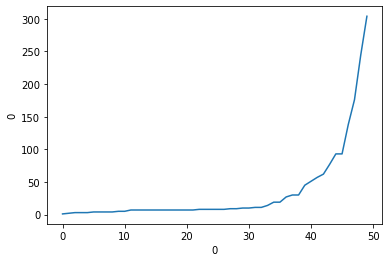

In [8]:
sb.lineplot(x=X[0], y=Y[0])

A function to return log of number of cases, in the desired base

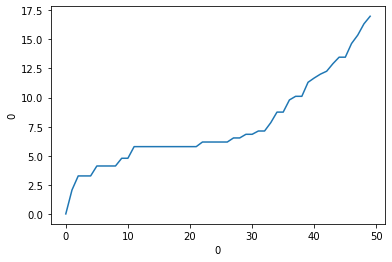

In [9]:
def Y_log(base=2):
    return pd.DataFrame(np.log(Y) / np.log(base))

sb.lineplot(x=X[0], y=Y_log(1.40)[0],)

We change the base of log from 1.01 to 2.50 and run linear regression algorithm to find the fittest base log

In [10]:
result_bank = {}
for base in range(101, 400):
    base /= 100
    lg = LinearRegression()
    Y_log_base = Y_log(base)
    lg.fit(X, Y_log_base)
    Y_pred = lg.predict(X)
    error = mean_absolute_error(Y_log_base,Y_pred)
    result_bank[base] = error ** base

In [11]:
result_bank

{1.01: 40.05716361815649,
 1.02: 20.591373539055734,
 1.03: 14.040470005460097,
 1.04: 10.734441987210165,
 1.05: 8.732391162875713,
 1.06: 7.385254703522343,
 1.07: 6.414002373106135,
 1.08: 5.67870036334099,
 1.09: 5.10137957980301,
 1.1: 4.635123785444037,
 1.11: 4.249992480096221,
 1.12: 3.925969431610515,
 1.13: 3.6491588783688846,
 1.14: 3.4096080614721336,
 1.15: 3.1999984465653566,
 1.16: 3.0148263148382473,
 1.17: 2.849871644424587,
 1.18: 2.7018434275555383,
 1.19: 2.5681365827204843,
 1.2: 2.446661508086141,
 1.21: 2.335722131638456,
 1.22: 2.2339270741777084,
 1.23: 2.140123879783304,
 1.24: 2.0533496085888934,
 1.25: 1.9727932267875763,
 1.26: 1.897766629589049,
 1.27: 1.8276820677264753,
 1.28: 1.7620343831718646,
 1.29: 1.7003868981591594,
 1.3: 1.6423601088484743,
 1.31: 1.5876225532322639,
 1.32: 1.5358833799288314,
 1.33: 1.4868862588422012,
 1.34: 1.4404043588237898,
 1.35: 1.3962361800521745,
 1.36: 1.3542020758314366,
 1.37: 1.314141334100493,
 1.38: 1.275909716136